In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.cm as cm
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

from matplotlib.offsetbox import OffsetImage, AnnotationBbox

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

## 10,000 Images

<ipython-input-4-6923f7153ea3>:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = cm.get_cmap("tab10", 10)


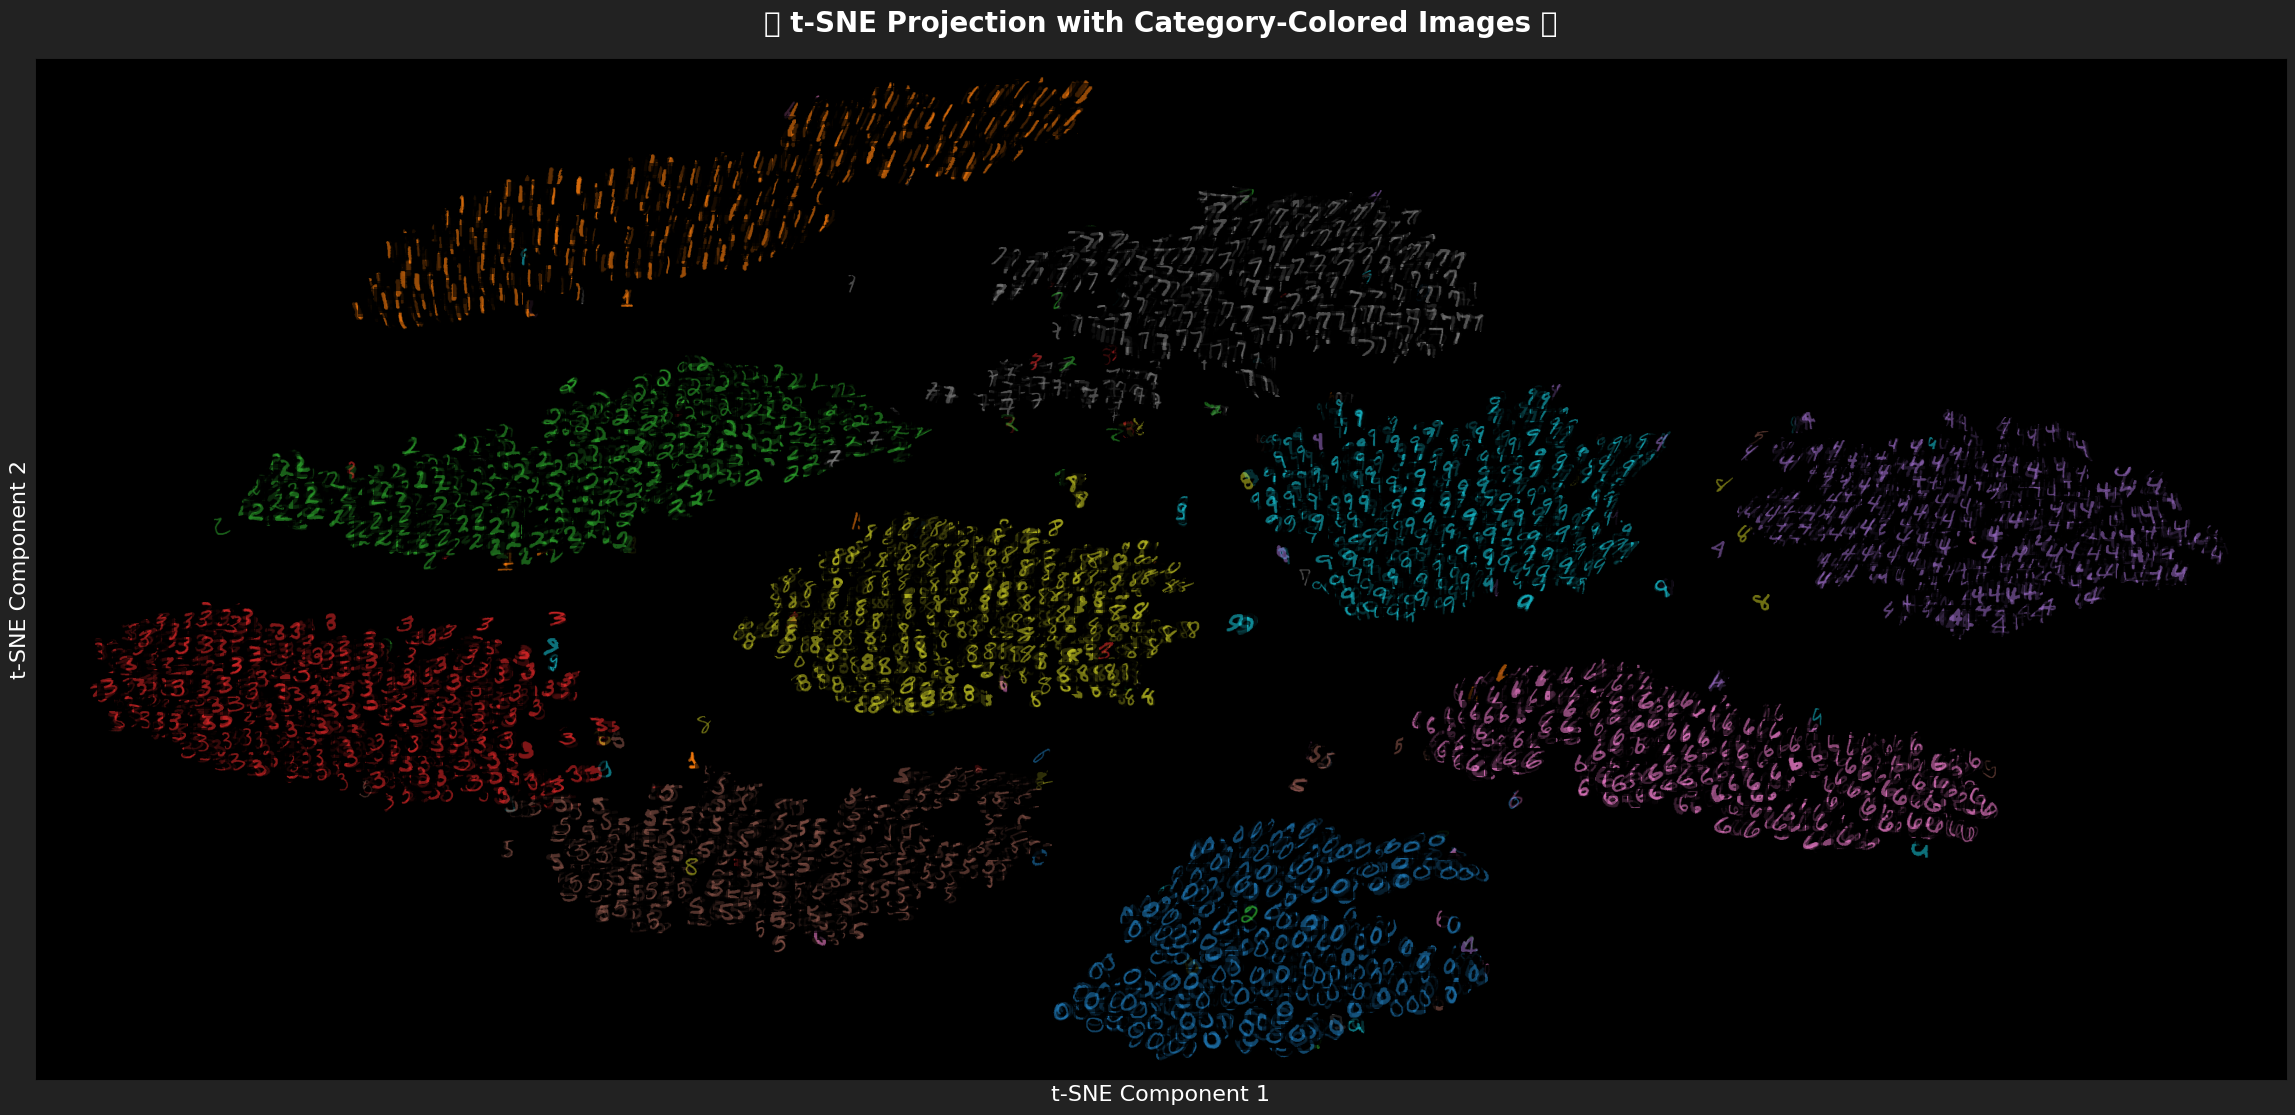

In [4]:
logits_2d = np.load('/content/2d_logits_test.npy')

color_map = cm.get_cmap("tab10", 10)

def colorize_image(img, color):
    """
    Adds a tint of the given color to a grayscale image.
    """
    img_colored = np.zeros((img.shape[0], img.shape[1], 4))  # RGBA
    img_colored[:, :, 0] = img * color[0]  # Red
    img_colored[:, :, 1] = img * color[1]  # Green
    img_colored[:, :, 2] = img * color[2]  # Blue
    img_colored[:, :, 3] = 1  # Alpha (transparency)
    return img_colored

# Create the figure with a dark theme
fig, ax = plt.subplots(figsize=(25, 12))
fig.patch.set_facecolor('#222222')  # Set figure background
ax.set_facecolor('#000000')  # Set axis background

# Set title with custom styling
ax.set_title("✨ t-SNE Projection with Category-Colored Images ✨", fontsize=20, fontweight="bold", color="white", pad=20)

# Function to overlay images instead of scatter points
def plot_image(x, y, img, ax, zoom=0.5, color=None):
    """Plots an image at (x, y) using a color-tinted version."""
    if color is not None:
        img = colorize_image(img, color)  # Apply color
    imgbox = OffsetImage(img, zoom=zoom, alpha=0.6)
    ab = AnnotationBbox(imgbox, (x, y), frameon=False)
    ax.add_artist(ab)

# Loop through each image and plot it at its corresponding t-SNE coordinate
for i in range(len(logits_2d)):
    digit_class = y_test[i]  # Get digit label (0-9)
    digit_color = color_map(digit_class)  # Assign color based on label
    plot_image(logits_2d[i, 0], logits_2d[i, 1], x_test[i], ax, zoom=0.6, color=digit_color)

# Customize axis appearance
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel("t-SNE Component 1", fontsize=16, fontweight="medium", color="white")
ax.set_ylabel("t-SNE Component 2", fontsize=16, fontweight="medium", color="white")

# Add a subtle grid for better readability
ax.grid(color="gray", linestyle="--", linewidth=0.5, alpha=0.5)

# Set limits to avoid images going outside the frame
ax.set_xlim(logits_2d[:, 0].min() - 5, logits_2d[:, 0].max() + 5)
ax.set_ylim(logits_2d[:, 1].min() - 5, logits_2d[:, 1].max() + 5)

# Reduce figure margin spacing
plt.subplots_adjust(left=0.05, right=0.95, top=0.90, bottom=0.05)

# Show the final visualization
plt.show()

## 60,000 Images

<ipython-input-5-358fef3003b9>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = cm.get_cmap("tab10", 10)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


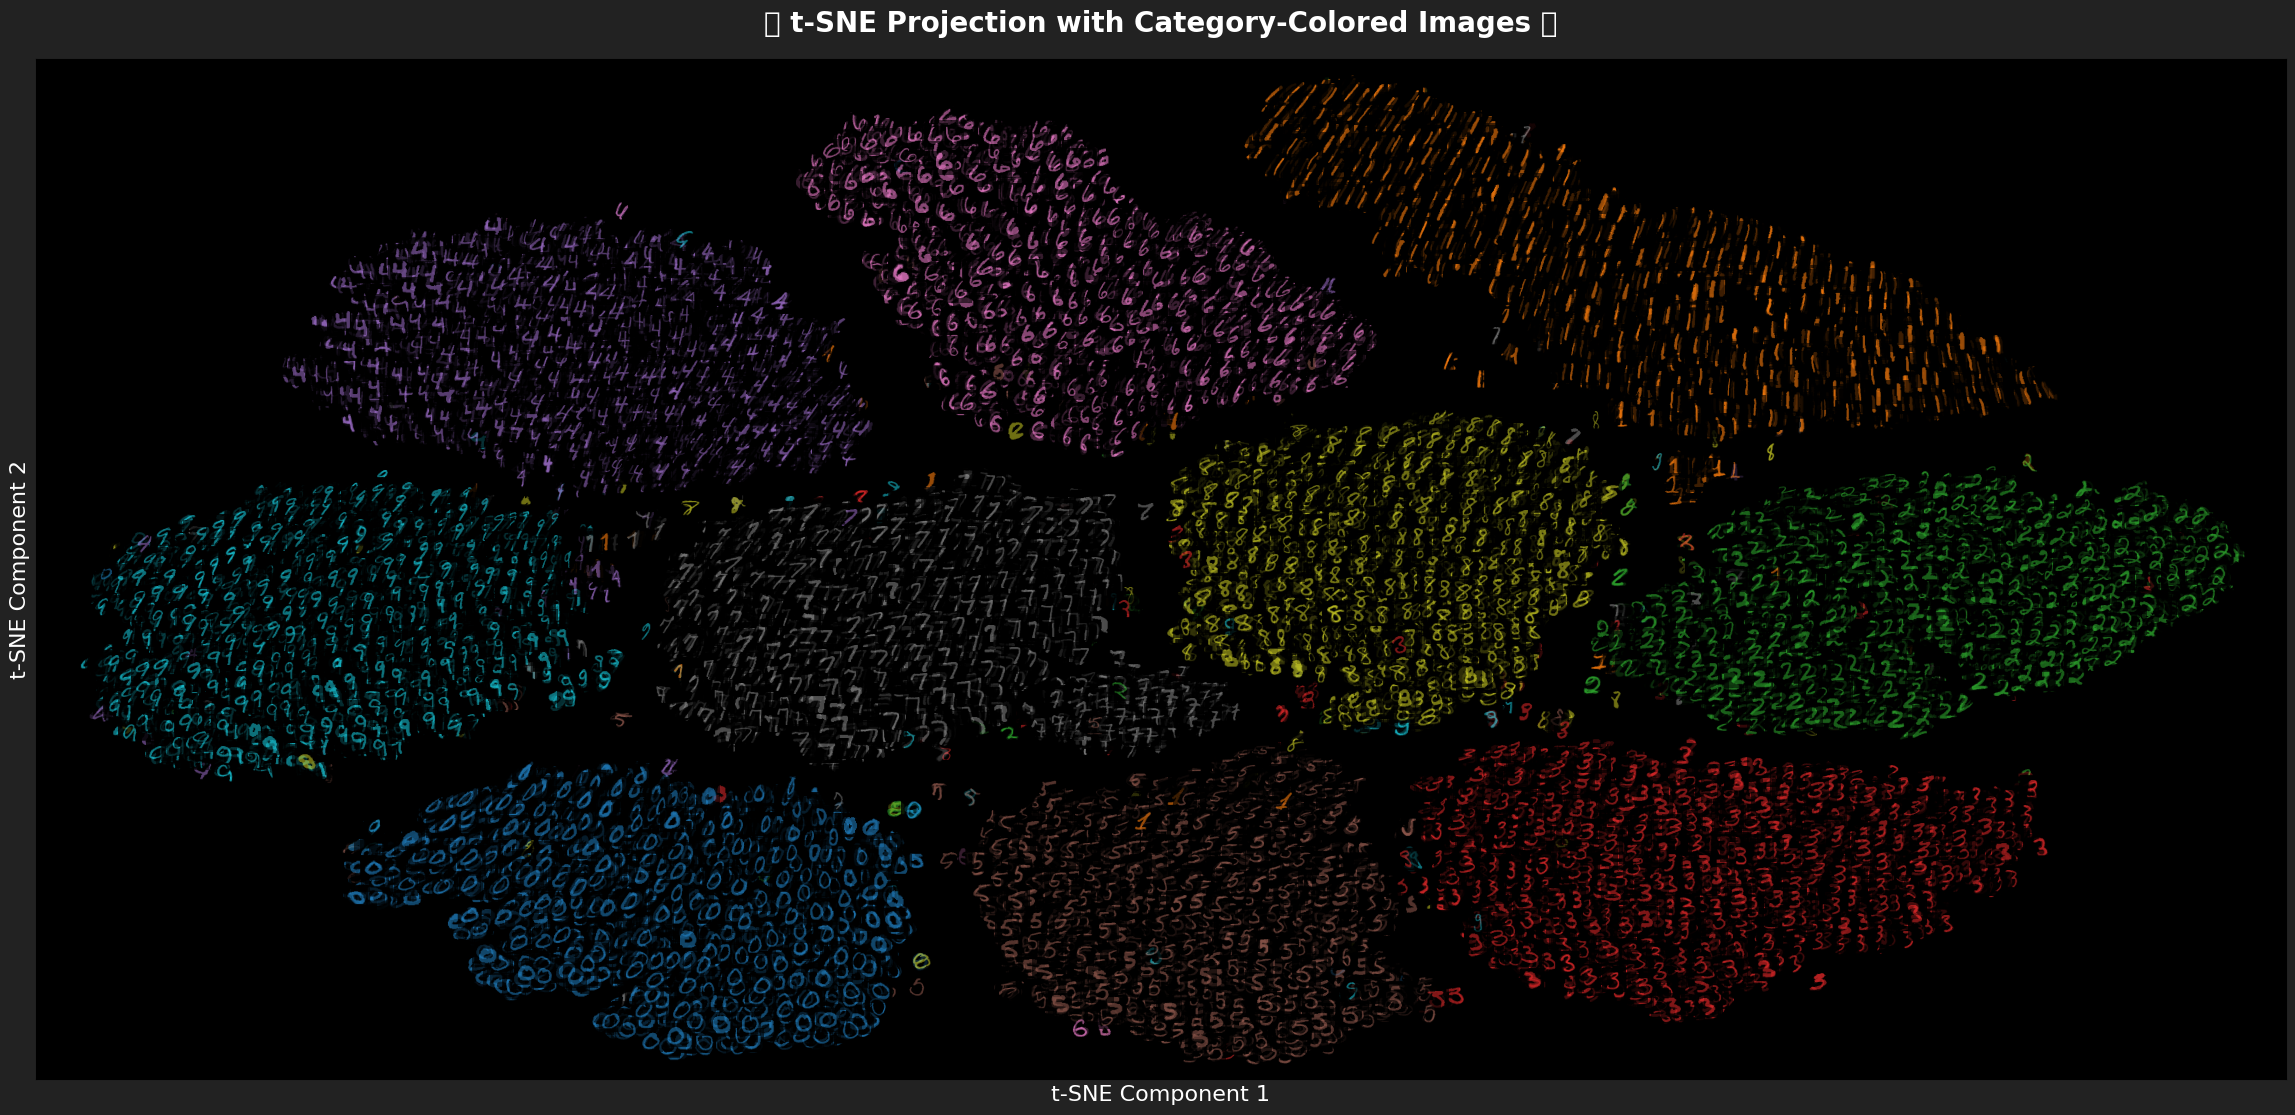

In [5]:
logits_2d = np.load('/content/2d_logits_train.npy')

color_map = cm.get_cmap("tab10", 10)

def colorize_image(img, color):
    """
    Adds a tint of the given color to a grayscale image.
    """
    img_colored = np.zeros((img.shape[0], img.shape[1], 4))  # RGBA
    img_colored[:, :, 0] = img * color[0]  # Red
    img_colored[:, :, 1] = img * color[1]  # Green
    img_colored[:, :, 2] = img * color[2]  # Blue
    img_colored[:, :, 3] = 1  # Alpha (transparency)
    return img_colored

# Create the figure with a dark theme
fig, ax = plt.subplots(figsize=(25, 12))
fig.patch.set_facecolor('#222222')  # Set figure background
ax.set_facecolor('#000000')  # Set axis background

# Set title with custom styling
ax.set_title("✨ t-SNE Projection with Category-Colored Images ✨", fontsize=20, fontweight="bold", color="white", pad=20)

# Function to overlay images instead of scatter points
def plot_image(x, y, img, ax, zoom=0.5, color=None):
    """Plots an image at (x, y) using a color-tinted version."""
    if color is not None:
        img = colorize_image(img, color)  # Apply color
    imgbox = OffsetImage(img, zoom=zoom, alpha=0.6)
    ab = AnnotationBbox(imgbox, (x, y), frameon=False)
    ax.add_artist(ab)

# Loop through each image and plot it at its corresponding t-SNE coordinate
for i in range(len(logits_2d)):
    digit_class = y_train[i]  # Get digit label (0-9)
    digit_color = color_map(digit_class)  # Assign color based on label
    plot_image(logits_2d[i, 0], logits_2d[i, 1], x_train[i], ax, zoom=0.6, color=digit_color)

# Customize axis appearance
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel("t-SNE Component 1", fontsize=16, fontweight="medium", color="white")
ax.set_ylabel("t-SNE Component 2", fontsize=16, fontweight="medium", color="white")

# Add a subtle grid for better readability
ax.grid(color="gray", linestyle="--", linewidth=0.5, alpha=0.5)

# Set limits to avoid images going outside the frame
ax.set_xlim(logits_2d[:, 0].min() - 5, logits_2d[:, 0].max() + 5)
ax.set_ylim(logits_2d[:, 1].min() - 5, logits_2d[:, 1].max() + 5)

# Reduce figure margin spacing
plt.subplots_adjust(left=0.05, right=0.95, top=0.90, bottom=0.05)

# Show the final visualization
plt.show()

In [6]:
plt.savefig('filename.png')

<Figure size 640x480 with 0 Axes>